<a href="https://colab.research.google.com/github/karritam12/CODSOFT/blob/main/CODSOFT_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: MOVIE RATING PREDICTION WITH PYTHON ; CODSOFT internship

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load and Inspect the Dataset

In [31]:
file_path = 'movi recomendation data.csv'
data = pd.read_csv(file_path, encoding='latin-1')  # Or 'utf-16', 'ISO-8859-1', etc.

In [32]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


In [34]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


# Handle Missing Values

In [35]:
print(data.isnull().sum())


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [36]:
# Drop rows with missing 'Rating'
data = data.dropna(subset=['Rating'])

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    data[col] = data[col].fillna('Unknown')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   float64
 2   Duration  5851 non-null   object 
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7919 non-null   object 
 7   Actor 1   7919 non-null   object 
 8   Actor 2   7919 non-null   object 
 9   Actor 3   7919 non-null   object 
dtypes: float64(2), object(8)
memory usage: 680.5+ KB


In [38]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Exploratory Data Analysis (EDA)

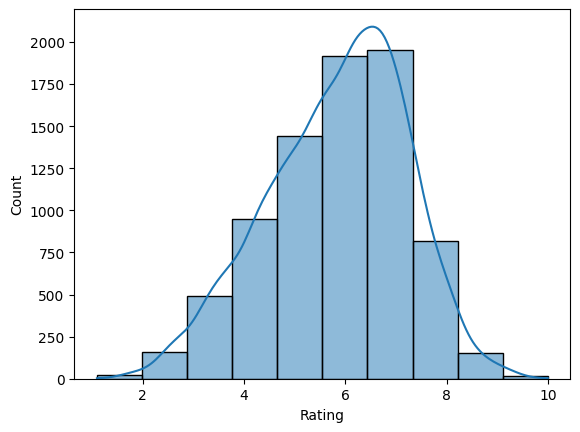

In [39]:
# Visualize distributions
sns.histplot(data['Rating'], bins=10, kde=True)
plt.show()

## Analyze relationships

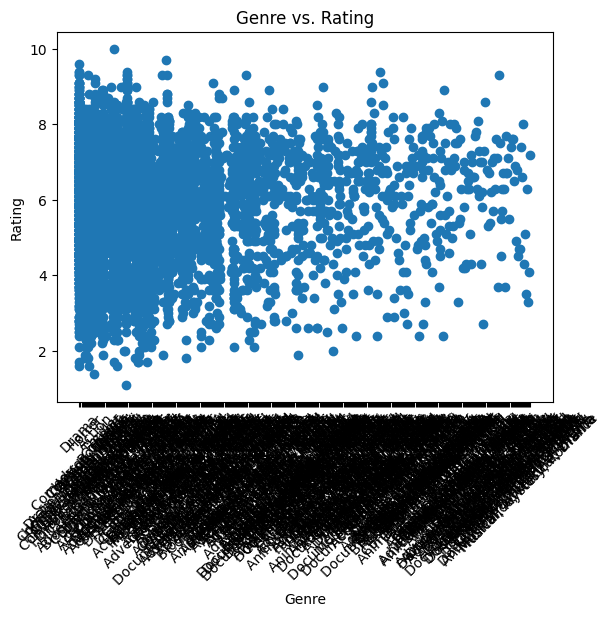

<Figure size 2000x1000 with 0 Axes>

In [41]:
plt.scatter(x=data["Genre"], y=data["Rating"])

plt.xlabel("Genre")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.title("Genre vs. Rating")
plt.figure(figsize=(20, 10))
plt.show()


# Model building

In [42]:
# install catboost
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [43]:
# Import CatBoost and Required Libraries

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


#  Define Features and Target

In [44]:
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']


#  Split Data into Training and Test Sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train CatBoostRegressor

**Specify the categorical columns:**

In [46]:
categorical_features = [0, 1, 2, 3, 4]  # Indices of categorical columns in X


**Train the model:**

In [47]:
model = CatBoostRegressor(cat_features=categorical_features, verbose=100, iterations=500, learning_rate=0.1, depth=6)
model.fit(X_train, y_train)


0:	learn: 1.3703451	total: 55.1ms	remaining: 27.5s
100:	learn: 1.1817318	total: 495ms	remaining: 1.96s
200:	learn: 1.1484338	total: 947ms	remaining: 1.41s
300:	learn: 1.1210232	total: 1.4s	remaining: 927ms
400:	learn: 1.0983087	total: 1.86s	remaining: 459ms
499:	learn: 1.0774792	total: 2.3s	remaining: 0us


# Predict Ratings

In [48]:
y_pred = model.predict(X_test)


In [53]:
y_pred

array([4.72414869, 4.89463192, 4.9514765 , ..., 5.82723699, 6.55722073,
       5.46718715])

# Evaluate the Model

**Calculate metrics**

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")


Mean Squared Error: 1.3320752168458878
R-Squared Score: 0.2835012244468921


# Visualize Results

**Compare actual vs. predicted ratings**

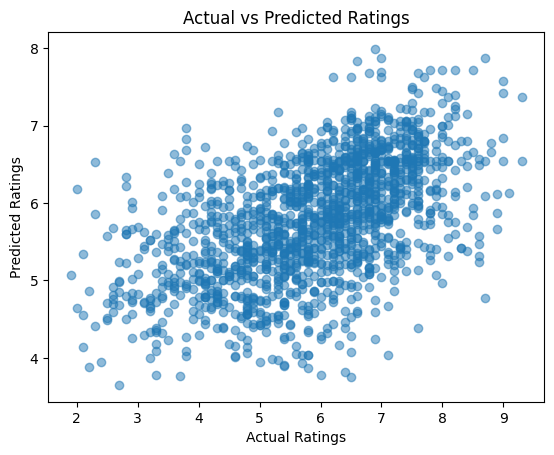

In [50]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()


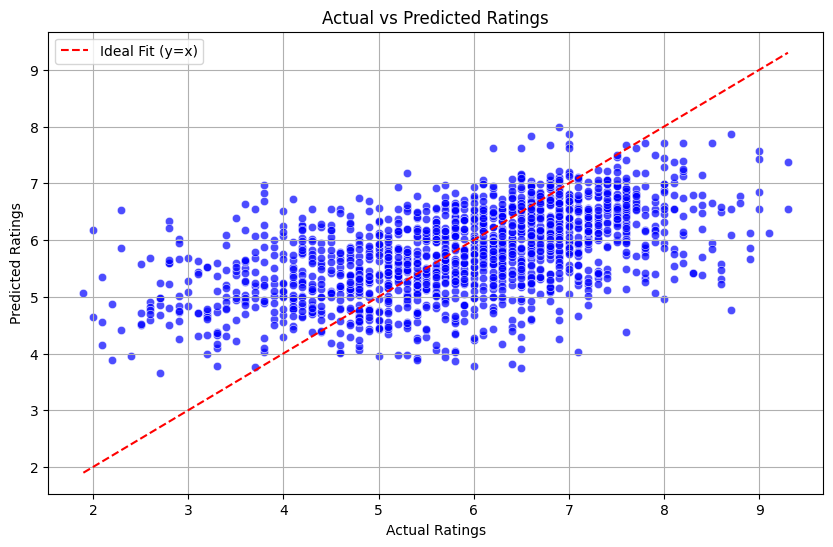

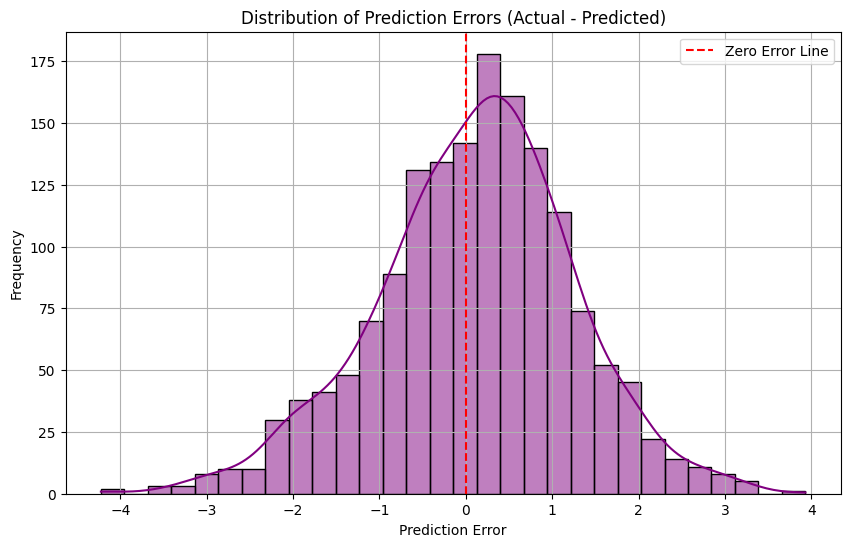

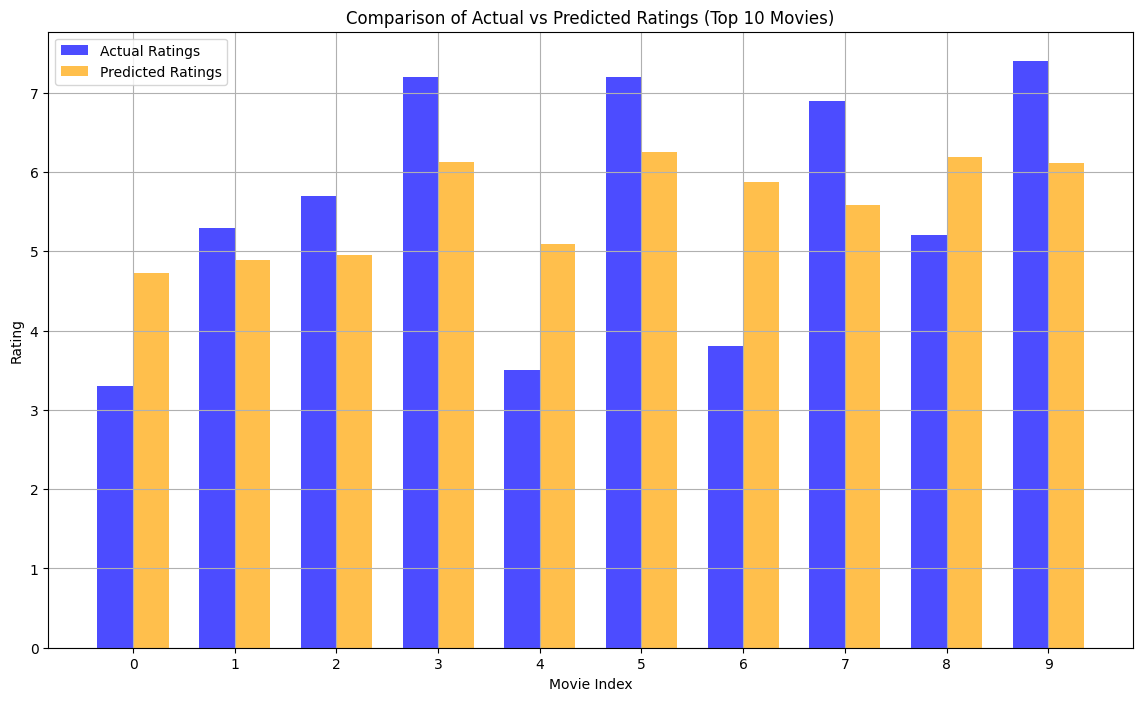

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.legend()
plt.grid(True)
plt.show()

# Histogram: Error distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Distribution of Prediction Errors (Actual - Predicted)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error Line')
plt.legend()
plt.grid(True)
plt.show()

# Bar plot: Comparison of top 10 predicted vs actual
plt.figure(figsize=(14, 8))
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df = comparison_df.reset_index(drop=True)
comparison_df = comparison_df.head(10)  # Select top 10 rows for visualization

bar_width = 0.35
indices = np.arange(len(comparison_df))

plt.bar(indices, comparison_df['Actual'], width=bar_width, label='Actual Ratings', alpha=0.7, color='blue')
plt.bar(indices + bar_width, comparison_df['Predicted'], width=bar_width, label='Predicted Ratings', alpha=0.7, color='orange')

plt.title('Comparison of Actual vs Predicted Ratings (Top 10 Movies)')
plt.xlabel('Movie Index')
plt.ylabel('Rating')
plt.xticks(indices + bar_width / 2, labels=indices)
plt.legend()
plt.grid(True)
plt.show()
